✅ Dataset loaded successfully

First 5 rows:
    age  sex  pain type   BP  cholestrol  fbs  resting ecg  max heart rate  \
0   70    1          4  130         322    0            2             109   
1   67    0          3  115         564    0            2             160   
2   57    1          2  124         261    0            0             141   
3   64    1          4  128         263    0            0             105   
4   74    0          2  120         269    0            2             121   

   exercise angina  ST depression  ST slope  flouroscopy coloured  thal  \
0                0            2.4         2                     3     3   
1                0            1.6         2                     0     7   
2                0            0.3         1                     0     7   
3                1            0.2         2                     1     7   
4                1            0.2         1                     1     3   

   target  
0       2  
1       1  
2   

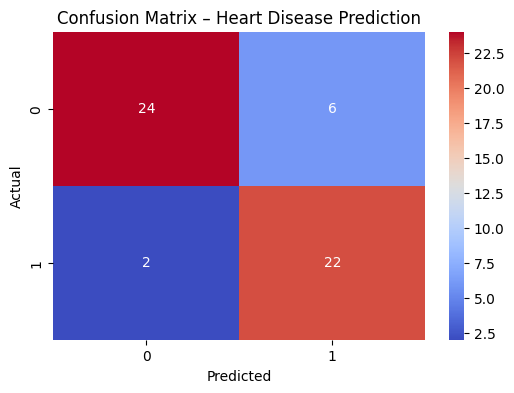

In [3]:
# 🧠 Heart Disease Prediction Using Machine Learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the dataset from a verified raw gist
url = "https://gist.githubusercontent.com/vivek2606/88ec0800798ee7bf8540193acde83553/raw/heart.csv"
df = pd.read_csv(url)
print("✅ Dataset loaded successfully")

# 2. Rename target column (if needed)
if 'heart disease' in df.columns:
    df = df.rename(columns={'heart disease': 'target'})

# 3. Quick glance
print("\nFirst 5 rows:\n", df.head())
print("\nDataset shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())

# 4. Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# 5. Train‑test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 8. Evaluate model
y_pred = model.predict(X_test_scaled)
print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# 9. Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix – Heart Disease Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
